<a href="https://colab.research.google.com/github/Mearafw/Mearafw.github.io/blob/main/code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pandas numpy scikit-learn nltk tensorflow transformers matplotlib seaborn

Step 2: Mount Google Drive and Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/My files/Files/Suicide_Detection.csv.zip')
print(df.shape)
df.head()

(232074, 3)


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
import zipfile # import the zipfile module

# Unzip the dataset
zip_file_path = '/content/drive/MyDrive/My files/Files/Suicide_Detection.csv.zip'
extract_to_folder = '/mnt/data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

 Step 3: Preprocess Data

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].astype(str).apply(clean_text)
df['label'] = LabelEncoder().fit_transform(df['class'])

# 70/15/15 split
X_train_val, X_test, y_train_val, y_test = train_test_split(df['text'], df['label'], test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)  # ≈15% validation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print("Total dataset size:", len(df))
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))


Total dataset size: 232074
Training set size: 162445
Validation set size: 34817
Testing set size: 34812


In [ ]:
stop_words = set(stopwords.words('english'))

 Step 4: Traditional ML Models (TF-IDF + SVM, NB, RF)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_acc = accuracy_score(y_val, svm_model.predict(X_val_tfidf))
print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.9261854841025936


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(true_labels, predicted_labels, predicted_probs=None):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    roc_auc = roc_auc_score(true_labels, predicted_probs) if predicted_probs is not None else 'N/A'

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}" if roc_auc != 'N/A' else "ROC AUC: N/A")

    return accuracy, precision, recall, f1, roc_auc


In [ ]:
svm_preds = svm_model.predict(X_val_tfidf)
evaluate_model(y_val, svm_preds)  # No probs, ROC AUC = N/A

Accuracy:  0.9262
Precision: 0.9362
Recall:    0.9146
F1 Score:  0.9253
ROC AUC: N/A


(0.9261854841025936,
 0.9361501794856706,
 0.9146208244696142,
 0.9252602803466528,
 'N/A')

In [ ]:
# Take a smaller slice if still crashing
X_sample = X_train[:3000]
y_sample = y_train[:3000]

X_sample_tfidf = tfidf.transform(X_sample)

rf_model = RandomForestClassifier(n_estimators=50, max_depth=15)
rf_model.fit(X_train_tfidf, y_train)
rf_acc = accuracy_score(y_val, rf_model.predict(X_val_tfidf))
print("RF Accuracy:", rf_acc)


RF Accuracy: 0.8625671367435448


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(true_labels, predicted_labels, predicted_probs=None):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    roc_auc = roc_auc_score(true_labels, predicted_probs) if predicted_probs is not None else 'N/A'

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}" if roc_auc != 'N/A' else "ROC AUC: N/A")

    return accuracy, precision, recall, f1, roc_auc


In [ ]:
rf_preds = rf_model.predict(X_val_tfidf)
rf_probs = rf_model.predict_proba(X_val_tfidf)[:, 1]  # class 1 probability
evaluate_model(y_val, rf_preds, rf_probs)


Accuracy:  0.8626
Precision: 0.8993
Recall:    0.8162
F1 Score:  0.8558
ROC AUC:   0.9323


(0.8625671367435448,
 0.8993411883947802,
 0.8162479158282068,
 0.8557822719189849,
 np.float64(0.9323400084509896))

In [ ]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_acc = accuracy_score(y_val, nb_model.predict(X_val_tfidf))
print("NB Accuracy:", nb_acc )


NB Accuracy: 0.8849987075279317


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(true_labels, predicted_labels, predicted_probs=None):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    roc_auc = roc_auc_score(true_labels, predicted_probs) if predicted_probs is not None else 'N/A'

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}" if roc_auc != 'N/A' else "ROC AUC: N/A")

    return accuracy, precision, recall, f1, roc_auc


In [ ]:
nb_preds = nb_model.predict(X_val_tfidf)
nb_probs = nb_model.predict_proba(X_val_tfidf)[:, 1]  # probability of class 1 (suicidal)
evaluate_model(y_val, nb_preds, nb_probs)


Accuracy:  0.8850
Precision: 0.8467
Recall:    0.9400
F1 Score:  0.8909
ROC AUC:   0.9635


(0.8849987075279317,
 0.8467036097156766,
 0.9399758523543954,
 0.8909051277859518,
 np.float64(0.9635384799580297))

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
# Step 5: LSTM Model
# -----------------------------------
from tensorflow.keras.preprocessing.text import Tokenizer # Use tensorflow.keras.preprocessing instead of keras.preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=60)
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=60)

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=64, input_length=60))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_val), epochs=5, batch_size=32)

lstm_pred = lstm_model.predict(X_val_seq) > 0.5
lstm_acc = accuracy_score(y_val, lstm_pred)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
5077/5077 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.8980 - loss: 0.2647 - val_accuracy: 0.9296 - val_loss: 0.1846
Epoch 2/5
5077/5077 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - accuracy: 0.9337 - loss: 0.1779 - val_accuracy: 0.9299 - val_loss: 0.1810
Epoch 3/5
5077/5077 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.9423 - loss: 0.1566 - val_accuracy: 0.9286 - val_loss: 0.1851
Epoch 4/5
5077/5077 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.9459 - loss: 0.1445 - val_accuracy: 0.9288 - val_loss: 0.1960
Epoch 5/5
5077/5077 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9517 - loss: 0.1280 - val_accuracy: 0.9276 - val_loss: 0.2039
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
lstm_probs = lstm_model.predict(X_val_seq).flatten()
lstm_preds = (lstm_probs > 0.5).astype(int)
evaluate_model(y_val, lstm_preds, lstm_probs)


1089/1089 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Accuracy:  0.9276
Precision: 0.9185
Recall:    0.9384
F1 Score:  0.9283
ROC AUC:   0.9774


(0.9275928425769021,
 0.918458075407991,
 0.9383660093140919,
 0.9283053209339363,
 np.float64(0.9773543129533392))

In [ ]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [ ]:
# Step 7: Results Summary
# -----------------------------------
results = {
    "Model": ["Naive Bayes", "SVM", "Random Forest", "LSTM", ],
    "Validation Accuracy": [nb_acc, svm_acc, rf_acc, lstm_acc, ]
}
pd.DataFrame(results)


,Model,Validation Accuracy
0,Naive Bayes,0.884999
1,SVM,0.926185
2,Random Forest,0.862567
3,LSTM,0.927593


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Validation Accuracy'].plot(kind='hist', bins=20, title='Validation Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Validation Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Validation Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Validation Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Validation Accuracy'].plot(kind='line', figsize=(8, 4), title='Validation Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Validation Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

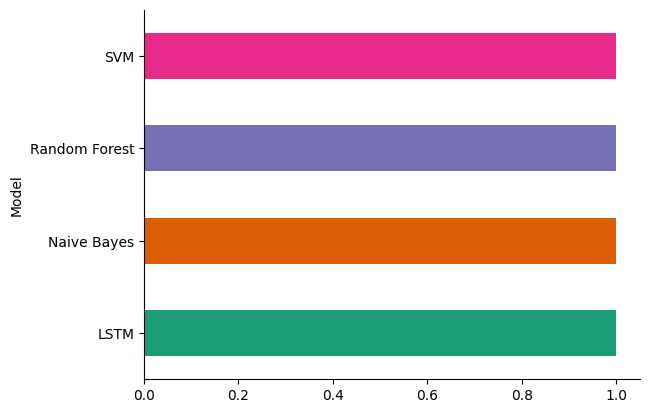

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

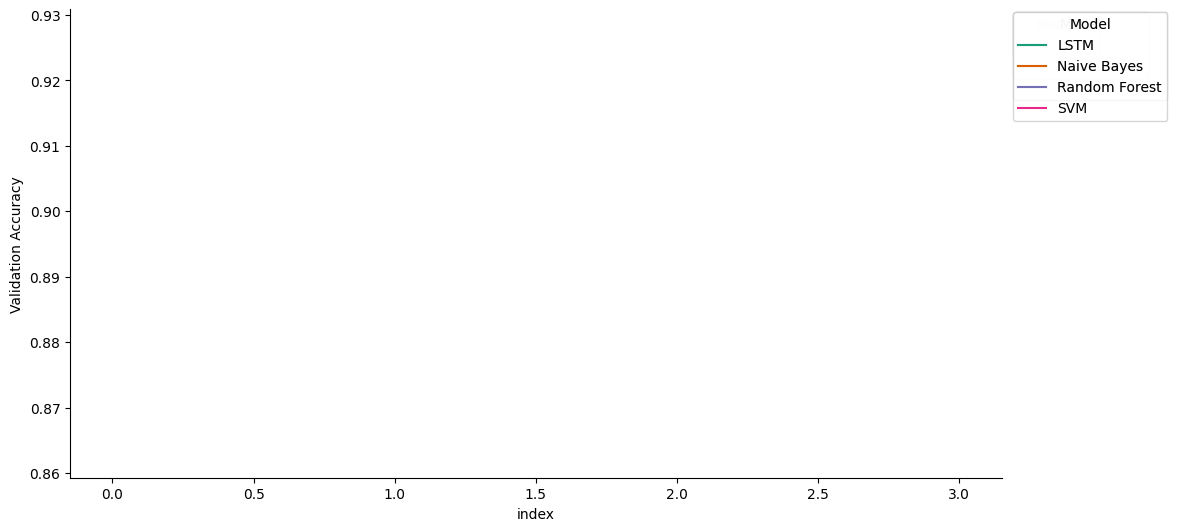

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Validation Accuracy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Validation Accuracy')

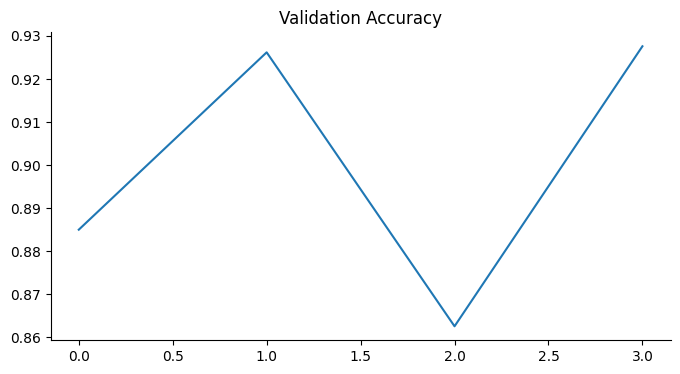

In [ ]:
from matplotlib import pyplot as plt
_df_7['Validation Accuracy'].plot(kind='line', figsize=(8, 4), title='Validation Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

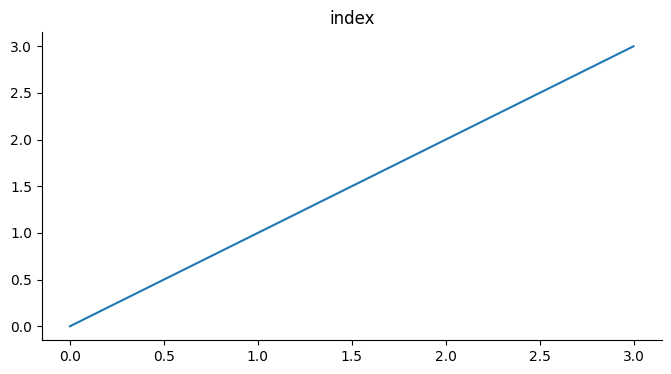

In [ ]:
from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:


# Save traditional models
import joblib
joblib.dump(svm_model, '/content/drive/MyDrive/My files/Files/suicide_svm_model.pkl')
joblib.dump(nb_model, '/content/drive/MyDrive/My files/Files/suicide_nb_model.pkl')
joblib.dump(rf_model, '/content/drive/MyDrive/My files/Files/suicide_rf_model.pkl')
joblib.dump(tfidf, '/content/drive/MyDrive/My files/Files/tfidf_vectorizer.pkl')
joblib.dump(tokenizer, '/content/drive/MyDrive/My files/Files/lstm_tokenizer.pkl')

# Save LSTM model
lstm_model.save('/content/drive/MyDrive/My files/Files/suicide_lstm_model.h5')

